<a href="https://colab.research.google.com/github/count-im/test/blob/main/Tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,False,True,False,True,False,False,False,True,False,True
1,10.34,1.66,3,True,False,False,True,False,False,False,True,False,True
2,21.01,3.50,3,True,False,False,True,False,False,False,True,False,True
3,23.68,3.31,2,True,False,False,True,False,False,False,True,False,True
4,24.59,3.61,4,False,True,False,True,False,False,False,True,False,True


In [5]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,False,True,False,True,False,False,False,True,False,True,1.01
1,10.34,3,True,False,False,True,False,False,False,True,False,True,1.66
2,21.01,3,True,False,False,True,False,False,False,True,False,True,3.50
3,23.68,2,True,False,False,True,False,False,False,True,False,True,3.31
4,24.59,4,False,True,False,True,False,False,False,True,False,True,3.61


In [6]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("팁스!")

팁스!


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [9]:
import numpy as np
W = np.random.rand(12)
b = np.random.rand()
print("팁스!")

팁스!


In [10]:
W

array([0.64457395, 0.71294885, 0.84074843, 0.2438888 , 0.20489418,
       0.77623674, 0.02197715, 0.0556237 , 0.37592866, 0.63121682,
       0.44722982, 0.49646994])

In [11]:
b

0.47591975678143394

In [13]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("팁스!")

팁스!


In [14]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("팁스!")

팁스!


In [15]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("팁스!")

팁스!


In [17]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)

    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return np.array(dW, dtype=np.float64), db
print("팁스!")

팁스!


In [18]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [650.40975486  79.04056533  19.17435664   8.97145418  10.81947239
  17.32633844   6.33845765   1.8244273   10.32228742   9.66063845
   6.75706995  21.38874088]
db: 28.145810824165927


In [19]:
LEARNING_RATE = 0.0001

In [20]:
%%time
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 30.7734
Iteration 20 : Loss 5.7462
Iteration 30 : Loss 2.6244
Iteration 40 : Loss 2.2318
Iteration 50 : Loss 2.1793
Iteration 60 : Loss 2.1691
Iteration 70 : Loss 2.1643
Iteration 80 : Loss 2.1601
Iteration 90 : Loss 2.1561
Iteration 100 : Loss 2.1520
Iteration 110 : Loss 2.1480
Iteration 120 : Loss 2.1440
Iteration 130 : Loss 2.1400
Iteration 140 : Loss 2.1360
Iteration 150 : Loss 2.1321
Iteration 160 : Loss 2.1282
Iteration 170 : Loss 2.1242
Iteration 180 : Loss 2.1203
Iteration 190 : Loss 2.1165
Iteration 200 : Loss 2.1126
Iteration 210 : Loss 2.1087
Iteration 220 : Loss 2.1049
Iteration 230 : Loss 2.1011
Iteration 240 : Loss 2.0973
Iteration 250 : Loss 2.0935
Iteration 260 : Loss 2.0897
Iteration 270 : Loss 2.0860
Iteration 280 : Loss 2.0822
Iteration 290 : Loss 2.0785
Iteration 300 : Loss 2.0748
Iteration 310 : Loss 2.0711
Iteration 320 : Loss 2.0674
Iteration 330 : Loss 2.0638
Iteration 340 : Loss 2.0601
Iteration 350 : Loss 2.0565
Iteration 360 : Loss 2.0529


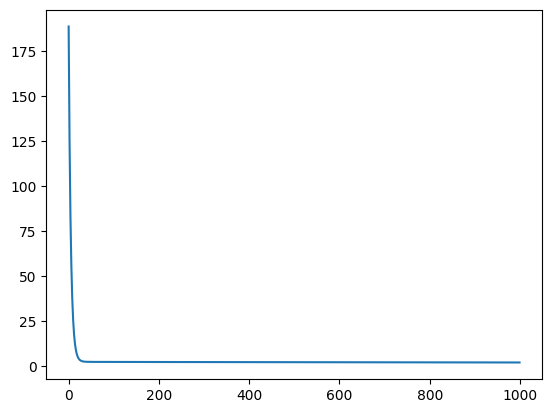

In [21]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [22]:
W, b

(array([-0.00636669,  0.50313094,  0.76356961,  0.23074433,  0.20019257,
         0.69061506,  0.00605947,  0.05599664,  0.34624623,  0.58612072,
         0.42920298,  0.42417349]),
 np.float64(0.38559647272140607))

In [23]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(1.8495519431331462)

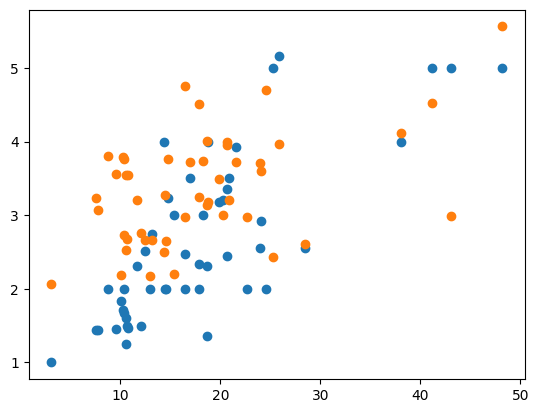

In [24]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [26]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
print("팁스!")

팁스!


In [28]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("팁스!")

팁스!


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("팁스!")

팁스!


In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print("팁스!")

팁스!


In [32]:
%%time
model.fit(X_train, y_train)

CPU times: user 4.24 ms, sys: 4 µs, total: 4.24 ms
Wall time: 31.6 ms


LinearRegression()

In [33]:
predictions = model.predict(X_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [34]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436103

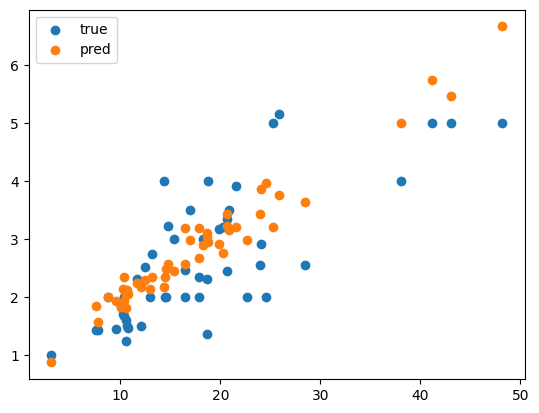

In [35]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()